Вариант №1 горизонтальная линия.

Необходимо разработать программу, обнаруживающую простейшие объекты или их границы на изображении.
Требуется составить матрицу свертки в соответствии с номером варианта и при помощи этой матрицы
обработать входное изображение. В результате обработки изображения должны быть подсвечены зоны
соответствующие варианту задания. Далее необходимо сформировать новое изображение,
в котором на однотонном фоне будут помещены обнаруженные фрагменты исходного изображения.
Изображение обрабатывается в оттенках серого.

In [1]:
def normalize (array):
    return array / np.amax(array)

1. сформировать матрицу свертки
примечание: чтобы получить необходимую матрицу был применен [метод научного тыка](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D1%80%D0%BE%D0%B1_%D0%B8_%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA#%D0%A2%D0%A0%D0%98%D0%97).

In [2]:
weights_verticals = [
    [0, 1, 0],
    [0, -1, 0],
    [0, 1, 0]
]
weights_points = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, -1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

2) применить матрицу свертки к исходному изображению

3) создать новое изображение, залить его выбранным цветом

4) скопировать выделенные фрагменты исходного изображения в новое изображение

In [3]:
import numpy as np
from scipy import ndimage
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [4]:
image = Image.open("lines.bmp")
image = 255 - np.array(image)[:, :, 0]
image = image % 2

without_verticals = normalize(ndimage.convolve(image, weights_verticals, mode = "constant", cval = 0))

points = normalize(ndimage.convolve(image, weights_points, mode = "constant", cval = 0))
without_points = without_verticals - points

5) оформить всё в виде работоспособной программы

тут просто представленны иллюстрации

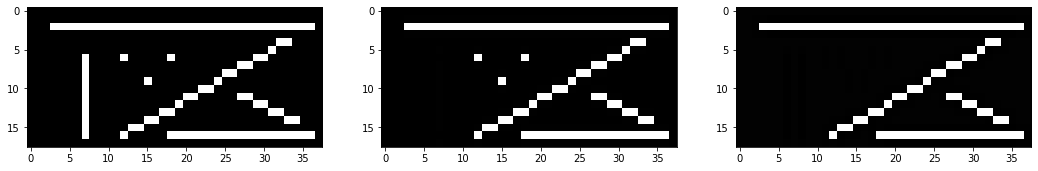

In [5]:
_, axs = plt.subplots(1, 3, figsize = (image.shape))
axs[0].imshow(image, cmap = "gray")
axs[1].imshow(without_verticals, cmap = "gray")
axs[2].imshow(without_points, cmap = "gray")